# Thai Document Words Separator

# TL;DR

In [22]:
from Detector import detector

IMG_PATH = "pictures/example_02.jpg"
OUT_DIR_PATH = "output/result.jpg"
box_imgs = detector(IMG_PATH, OUT_DIR_PATH)

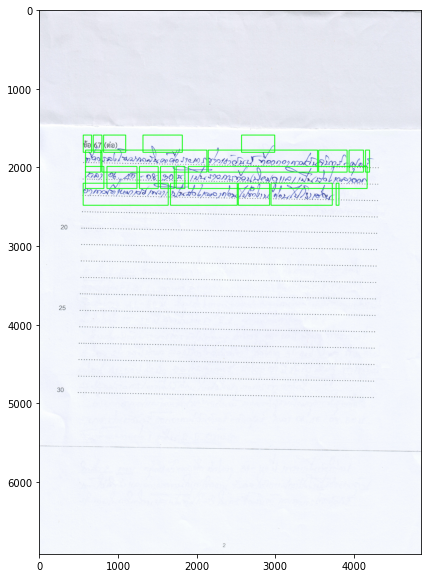

In [23]:
# Visualize result.jpg
import cv2
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
img = cv2.imread(OUT_DIR_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

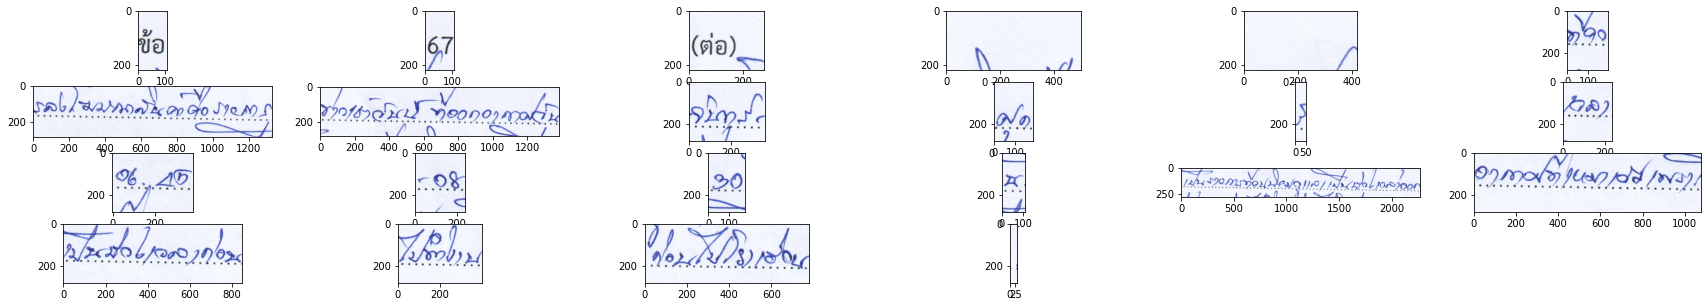

In [21]:
# Visualize returned output: box_imgs
plt.figure(figsize=(30,5))
i=1
count = len(box_imgs)
for box_img in box_imgs:
  box_img = cv2.cvtColor(box_img, cv2.COLOR_BGR2RGB)
  plt.subplot(count//6+1,6,i)
  plt.imshow(box_img)
  i+=1
plt.show()

# Pipeline details:

In [24]:
from preprocessor.preprocess import preprocess
from rowSeparator.rowSeparator import rowSeparator
from wordSeparator.wordSeparator import wordSeparator

from matplotlib import pyplot as plt

## Preprocess

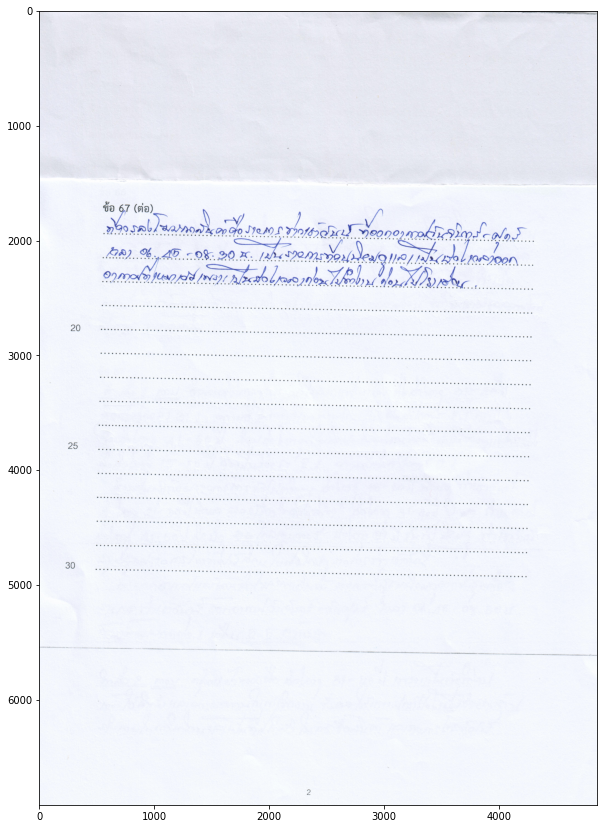

In [25]:
IMG_PATH = "pictures/example_02.jpg"
rgb_image, p_image = preprocess(IMG_PATH)
plt.figure(figsize=(10,15))
plt.imshow(rgb_image)

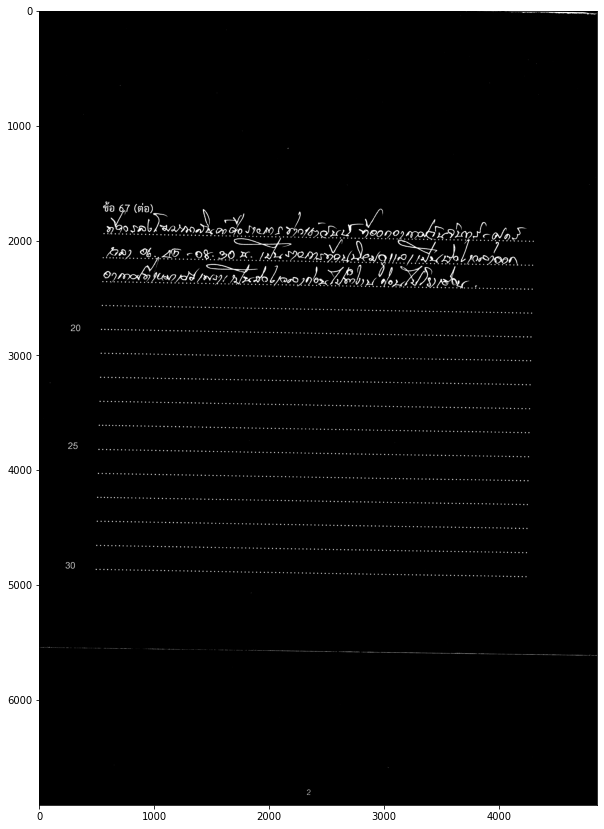

In [26]:
plt.figure(figsize=(10,15))
plt.imshow(p_image, cmap="gray")

## Row Separator

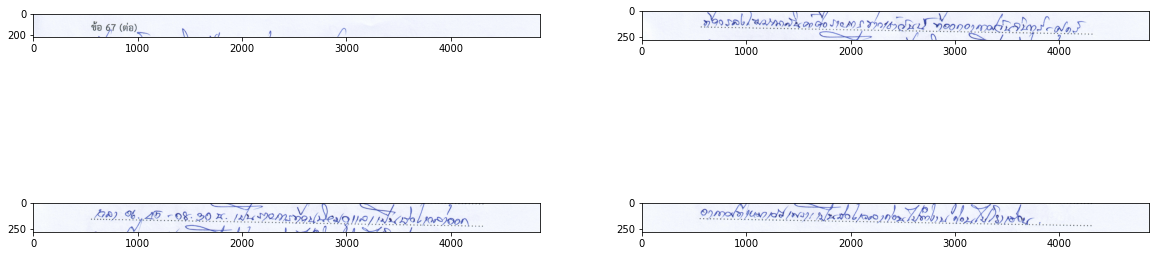

In [27]:
lines = rowSeparator(p_image)

plt.figure(figsize=(20,10))
i=1
for y_upper, y_lower in lines: 
  plt.subplot(len(lines)//2+1,2,i)
  plt.imshow(rgb_image[y_upper:y_lower,:], cmap="gray")
  i+=1

## Word Separator

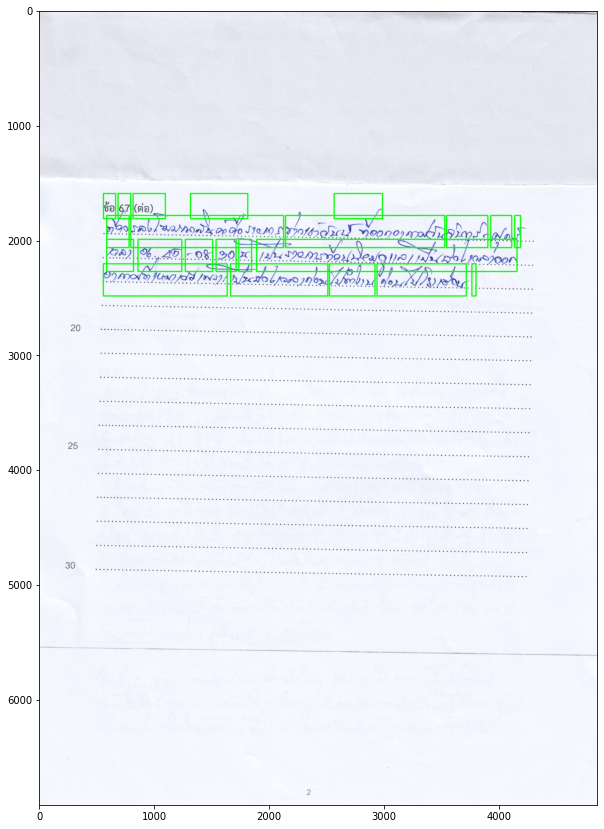

In [28]:
import cv2
lines = rowSeparator(p_image)

for y_upper, y_lower in lines: 
  imgs = wordSeparator(rgb_image[y_upper:y_lower,:], p_image[y_upper:y_lower,:])
  for x_left, x_right in imgs: 
    start_point = (x_left, y_upper)
    end_point = (x_right, y_lower)
    color = (0,255,0)
    thickness = 10
    cv2.rectangle(rgb_image, start_point, end_point, color, thickness)
    plt.show()

plt.figure(figsize=(10,15))
plt.imshow(rgb_image)
plt.show()